In [1]:
file=r'C:\Users\umairansari\Desktop'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import math
from math import floor
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(file+r"\profiles_ok_cupid.csv")

In [4]:
#splitting the data into test and train
train,test=train_test_split(data,random_state=19,shuffle=True,test_size=.30)
print("the dimension of test data is"+str(test.shape))
print("the dimension of train data is"+str(train.shape))

the dimension of test data is(18166, 31)
the dimension of train data is(42386, 31)


In [5]:
train.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
1519,24,athletic,strictly anything,socially,sometimes,space camp,i'm not going to be able to sum myself up in t...,loving san francisco. not that i have much to ...,cooking<br />\ncreating awkward situations<br ...,whether or not i am present.(in company)(there...,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,NaN,m,virgo but it doesn&rsquo;t matter,no,"english (fluently), sanskrit (fluently)",single
529,46,fit,anything,socially,NaN,graduated from college/university,i'm not macho and i don't need to prove anythi...,NaN,selecting friends. and feeding those relations...,"my smile is big and sincere, eye contact and a...",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs,NaN,m,pisces and it&rsquo;s fun to think about,no,english,single
41425,29,athletic,mostly anything,socially,sometimes,working on space camp,"happy, easy, compassionate, excitable, want to...","trying to go to vet school, and have fun mostly.",NaN,my weirdo asymmetric haircut.,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,has dogs and has cats,atheism,f,pisces but it doesn&rsquo;t matter,no,english,single
38814,25,NaN,mostly vegetarian,socially,never,graduated from college/university,"living in the east bay currently, went to coll...",NaN,"being present for my work, family &amp; friend...","i'm warm &amp; calm, excited to meet new peopl...",...,"berkeley, california",NaN,straight,likes dogs,NaN,f,NaN,no,"english, spanish",single
16190,25,athletic,anything,socially,never,working on space camp,"i'm a grounded, fun, outgoing, artistic, emoti...",i'm pursuing my dream of acting and singing.<b...,"typing, making coffee, making pancakes.","my name, my height",...,"san francisco, california",NaN,gay,likes dogs and likes cats,other,m,aquarius and it&rsquo;s fun to think about,no,"english, italian (poorly)",single


In [6]:
train.shape

(42386, 31)

In [7]:
train.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [8]:
train["status"].value_counts()

single            38987
seeing someone     1453
available          1297
married             215
unknown               6
Name: status, dtype: int64

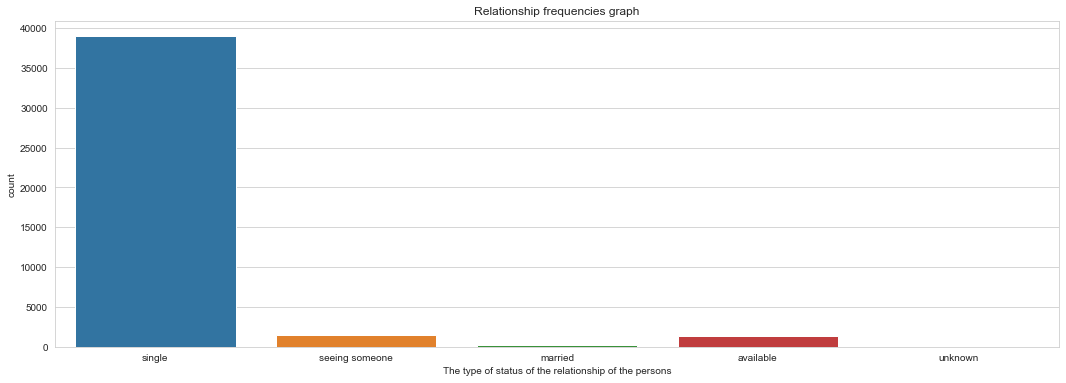

Wall time: 2.25 s


In [9]:
%%time
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
plt.title("Relationship frequencies graph")
sns.countplot(train["status"])
plt.xlabel("The type of status of the relationship of the persons")
plt.show()

In [10]:
%%time
train["status"].value_counts()
#counting the values of the status of the data 
#data["status"].fillna("test",inplace=True)
#filling the na data to prepare for the test data as we dont know the test data 
#datatest=data[data["status"]=="test"]
#retreiving the data and saperating it for test and train
#data=data.loc[data["status"]!="test"]
train.dropna(subset=["status"],axis=0,inplace=True)
test.dropna(subset=["status"],axis=0,inplace=True)
#print("The new shape of the train data is"+str(datatest.shape))
print("The new shape of the train data is"+str(train.shape))
print("The new shape of the test data is"+str(test.shape))
#total=datatest.shape[0]+data.shape[0]
#print("The total data we have now is "+str(total))

The new shape of the train data is(41958, 31)
The new shape of the test data is(17985, 31)
Wall time: 188 ms


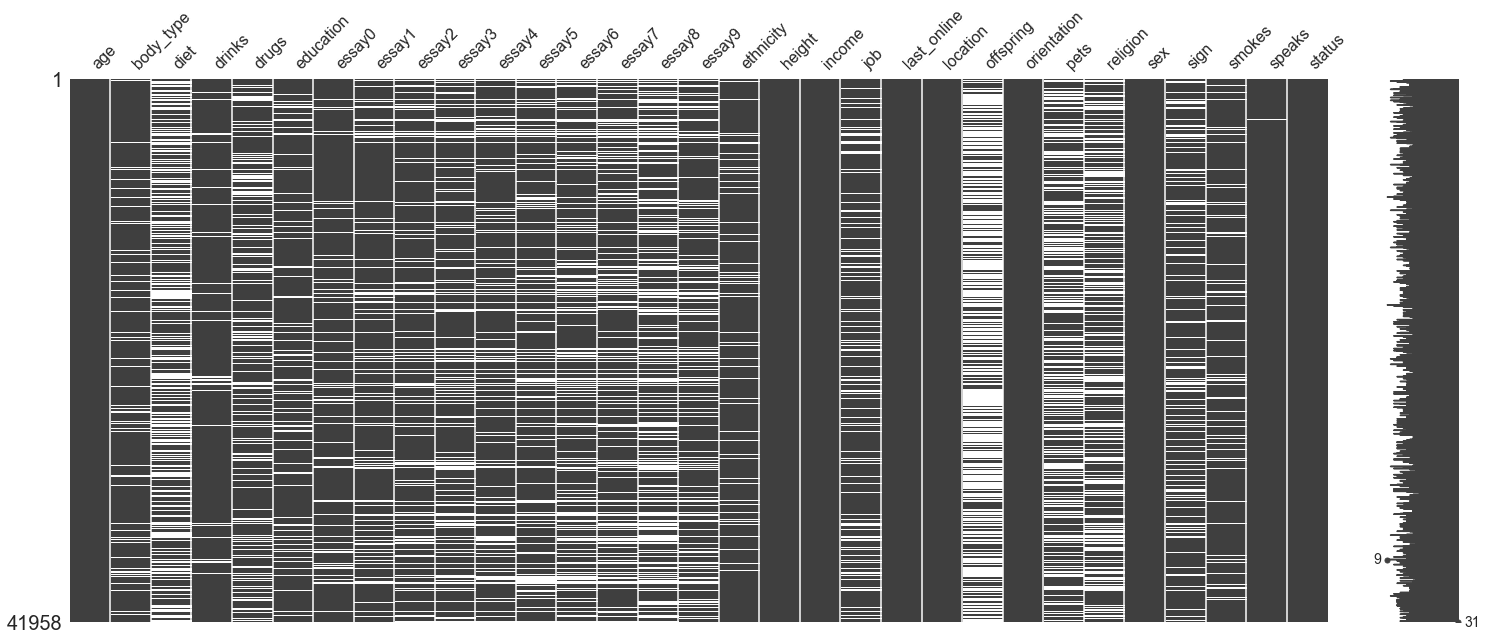

In [11]:
#miissing walues in the train data set
msno.matrix(train)


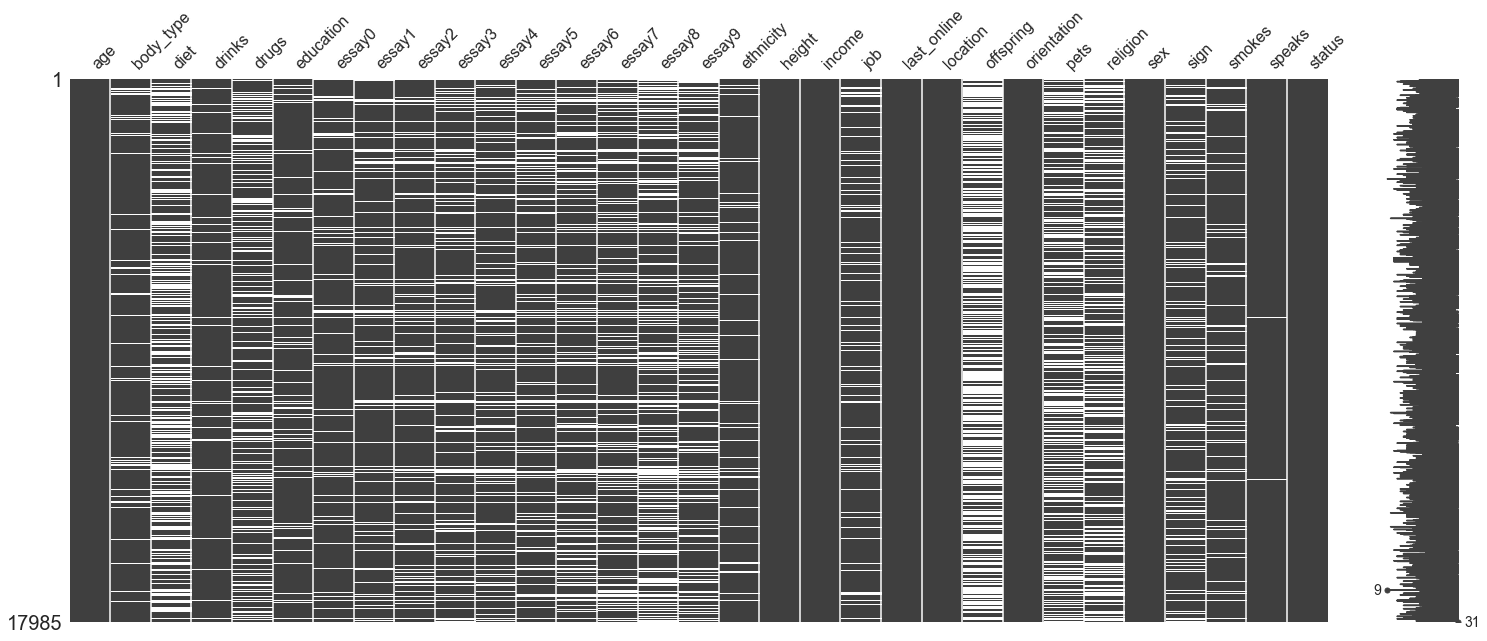

In [12]:
#miissing walues in the train data set
msno.matrix(test)

In [13]:
%%time
#getting the data for the body type
train["body_type"].isna().sum()
#filling the values of the test and train data with other type

train["body_type"].fillna("other",inplace=True)
test["body_type"].fillna("other",inplace=True)

Wall time: 46.9 ms


In [14]:
%%time
#flling the na data for diet column according to the domain knowledge
train["diet"].fillna("prefer not to say",inplace=True)
test["diet"].fillna("prefer not to say",inplace=True)

Wall time: 31.3 ms


In [15]:
%%time
#filling the na data for drinks according to the domain knowledge column
train["drinks"].fillna("prefer not to say",inplace=True)
test["drinks"].fillna("prefer not to say",inplace=True)

Wall time: 17.5 ms


In [16]:
%%time
#changing the type of the height column to numeric 
train["height"]=pd.to_numeric(train["height"],errors='coerce')
test["height"]=pd.to_numeric(test["height"],errors='coerce')

Wall time: 270 ms


In [17]:
print("The mean of the target column is "+str(np.mean(train["height"])))

The mean of the target column is 68.29777142176141


In [18]:
floor(np.mean(train["height"]))

68

In [19]:
#function to detect outliers for the data 
def detect_outliers(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        print(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [20]:
test.shape

(17985, 31)

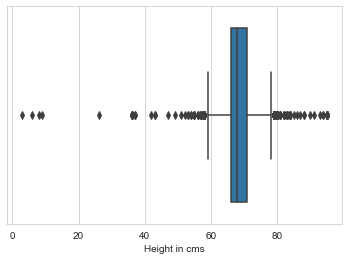

In [21]:
#checking the height whether it contains outliers or not
sns.boxplot(train["height"])
plt.xlabel("Height in cms")
plt.show()

In [22]:
#detecting the outliers after seeing the boxplot whiskers
heightoutliers=train.loc[train["height"]>80]
heightoutliers=train.loc[train["height"]<58]
print("People with more that normal height are in train set "+str(heightoutliers.shape[0]))

People with more that normal height are in train set 49


In [23]:
%%time
#filling the NA values according to the domain knowledge of heights 
#data["height"].mean()
print("The median is "+str(train["height"].median()))
#we are filling the NA data of height column after checking the outliers 
train["height"].fillna(floor(np.mean(train["height"])),inplace=True)
test["height"].fillna(floor(np.mean(train["height"])),inplace=True)


The median is 68.0
Wall time: 15.6 ms


In [24]:
%%time
#filling the NA values according to the domain knowledge
train["drugs"].fillna("prefer not to say",inplace=True)
test["drugs"].fillna("prefer not to say",inplace=True)

Wall time: 15.6 ms


In [25]:
%%time
#filling the NA values according to the domain knowledge
train["education"].isna().sum()
train["education"].fillna("prefer not to say",inplace=True)
test["education"].fillna("prefer not to say",inplace=True)

Wall time: 15.6 ms


In [26]:
%%time
#filling the NA values according to the domain knowledge
train["job"].isna().sum()
train["job"].fillna("prefer not to say",inplace=True)
test["job"].fillna("prefer not to say",inplace=True)

Wall time: 31.3 ms


In [27]:
train["offspring"].value_counts()

doesn&rsquo;t have kids                                5282
doesn&rsquo;t have kids, but might want them           2688
doesn&rsquo;t have kids, but wants them                2495
doesn&rsquo;t want kids                                2060
has a kid                                              1333
has kids                                               1271
doesn&rsquo;t have kids, and doesn&rsquo;t want any     778
has kids, but doesn&rsquo;t want more                   320
has a kid, but doesn&rsquo;t want more                  211
wants kids                                              160
has a kid, and might want more                          155
might want kids                                         123
has kids, and might want more                            86
has a kid, and wants more                                46
has kids, and wants more                                 13
Name: offspring, dtype: int64

In [28]:
%%time
#filling the NA values according to the domain knowledge
train["offspring"].isna().sum()
#data["offspring"]=data["offspring"].apply(lambda p:p.replace("&rsquo;","o"))
train["offspring"]=train["offspring"].str.replace("&rsquo;","o")
test["offspring"]=test["offspring"].str.replace("&rsquo;","o")

train["offspring"].fillna("prefer not to say",inplace=True)

test["offspring"].fillna("prefer not to say",inplace=True)
test.shape,train.shape

Wall time: 156 ms


((17985, 31), (41958, 31))

In [29]:
train["pets"].fillna("dont like pets",inplace=True)
test["pets"].fillna("dont like pets",inplace=True)

In [30]:
%%time
#filling the NA values according to the domain knowledge
train["religion"].isna().sum()

Wall time: 0 ns


14104

In [31]:
%%time
#filling the NA values according to the domain knowledge
train["religion"].fillna("prefer not to say",inplace=True)
test["religion"].fillna("prefer not to say",inplace=True)

Wall time: 15.6 ms


In [32]:
%%time
#filling the NA values according to the domain knowledge
train["smokes"].isna().sum()
train["smokes"].fillna("prefer not to say",inplace=True)
test["smokes"].fillna("prefer not to say",inplace=True)

Wall time: 15.6 ms


In [33]:
%%time
#filling the NA values according to the domain knowledge
#removing the irrational taggs from the data
train["sign"]=train["sign"].str.replace("&rsquo;","")
test["sign"]=test["sign"].str.replace("&rsquo;","")

train["sign"].value_counts()
train["sign"].fillna("prefer not to say",inplace=True)
test["sign"].fillna("prefer not to say",inplace=True)

Wall time: 219 ms


In [34]:
%%time
#filling the NA values according to the domain knowledge
train["ethnicity"].value_counts().sum()
train["ethnicity"].fillna("prefer not to say",inplace=True)
test["ethnicity"].fillna("prefer not to say",inplace=True)

Wall time: 46.9 ms


In [35]:
train["essay0"].head(20)

1519     i'm not going to be able to sum myself up in t...
529      i'm not macho and i don't need to prove anythi...
41425    happy, easy, compassionate, excitable, want to...
38814    living in the east bay currently, went to coll...
16190    i'm a grounded, fun, outgoing, artistic, emoti...
13858    student of life... if you saw me on a friday n...
28691    i'm geminiacally versatile with eclectic and b...
29057    i'm looking for someone with whom to experienc...
45120    well hello there.<br />\ni am a social kind a ...
59899    i'm just me... to me, getting the know someone...
23229    i keep a journal and i love music. i'm quiet a...
47758    i am a happy person, i like my job, i love my ...
14171    born and raised in san diego. moved to sf afte...
3449     i like people but i'm usually shy when first m...
24341                                                  NaN
4523     poly-exploring texas boy transplanted joyously...
46924         "that it aint no sin to be glad your alive

In [36]:
#getting the column names of essay0:essay9
train.columns
colnames_essay=train.columns.values[6:16]
colnames_essay

array(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5',
       'essay6', 'essay7', 'essay8', 'essay9'], dtype=object)

In [37]:
%%time
#cleaning the data to remove some irrational tags
for col in colnames_essay:
    train[col]=train[col].str.replace("<br />","")
    train[col]=train[col].str.replace("/n","")
    train[col]=train[col].str.replace("\n","")
    train[col]=train[col].str.replace(":"," ")
    train[col]=train[col].str.replace('<em>','')    
    train[col]=train[col].str.replace('<strong>','')
    test[col]=test[col].str.replace("<br />","")
    test[col]=test[col].str.replace("/n","")
    test[col]=test[col].str.replace("\n","")
    test[col]=test[col].str.replace(":"," ")
    test[col]=test[col].str.replace('<em>','')    
    test[col]=test[col].str.replace('<strong>','')


Wall time: 13.5 s


In [38]:
%%time
#checking the column heads to get the overview of the data they contains 
for col in colnames_essay:
    print(train[col].head(5))

1519     i'm not going to be able to sum myself up in t...
529      i'm not macho and i don't need to prove anythi...
41425    happy, easy, compassionate, excitable, want to...
38814    living in the east bay currently, went to coll...
16190    i'm a grounded, fun, outgoing, artistic, emoti...
Name: essay0, dtype: object
1519     loving san francisco. not that i have much to ...
529                                                    NaN
41425     trying to go to vet school, and have fun mostly.
38814                                                  NaN
16190    i'm pursuing my dream of acting and singing.i'...
Name: essay1, dtype: object
1519     cookingcreating awkward situationsmaking peopl...
529      selecting friends. and feeding those relations...
41425                                                  NaN
38814    being present for my work, family &amp; friend...
16190              typing, making coffee, making pancakes.
Name: essay2, dtype: object
1519     whether or not i am pr

In [39]:
%%time
#renaming the columns to be more specific details
train.rename(columns={'essay0':'aboutme',
                          'essay1':'work_profession_details',
                          'essay2':'your_speciality','essay3':'describe_your_look','essay4':'your_interests',
                    'essay4':'things_you_do','essay5':'things_you_love_todo','essay6':'things_you_love_todo1',
                    'essay7':'things_you_prefer_todo','essay8':'what_brings_you_here','essay9':'pickup_lines'}, 
                 inplace=True)
test.rename(columns={'essay0':'aboutme',
                          'essay1':'work_profession_details',
                          'essay2':'your_speciality','essay3':'describe_your_look','essay4':'your_interests',
                    'essay4':'things_you_do','essay5':'things_you_love_todo','essay6':'things_you_love_todo1',
                    'essay7':'things_you_prefer_todo','essay8':'what_brings_you_here','essay9':'pickup_lines'}, 
                 inplace=True)
 

Wall time: 93.8 ms


In [40]:
#checking the new column names
train.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'aboutme',
       'work_profession_details', 'your_speciality', 'describe_your_look',
       'things_you_do', 'things_you_love_todo', 'things_you_love_todo1',
       'things_you_prefer_todo', 'what_brings_you_here', 'pickup_lines',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

In [41]:
%%time
#colnames_essay_modified=list(train.columns.values[6:16])
#colnames_essay_modified
#for col in colnames_essay_modified:
cleaned_datatrain=train.drop(train.columns[6:16], axis = 1) 
cleaned_datatest=test.drop(test.columns[6:16], axis = 1) 
#cleaned_data=data.dropna(subset=colnames_essay_modified,axis=1)

Wall time: 31.3 ms


In [42]:
cleaned_datatest.shape

(17985, 21)

In [43]:
cleaned_datatest.shape,cleaned_datatrain.shape

((17985, 21), (41958, 21))

In [44]:
cleaned_datatrain.to_csv("OKCUPID_cleaned_data_train.csv",index=False)
cleaned_datatest.to_csv("OKCUPID_cleaned_data_test.csv",index=False)

In [45]:
#import os
#os.getcwd()


# Explanatory Data Analysis

In [46]:
# #checking the data of test and train for target column
# #fucntion for the subplots to check the distribution of target 0 and 1
# def plot_feature_target(df1,df2,label1,label2,features):
#     #making the subplots of 10,10 
#     fig,ax=plt.subplots(1,1,figsize=(18,22))
#     #making a counter variable
#     i=0
#     #iterating over the loop for setting the counter variable to zero to 100
#     for feature in features:
#         i+=1
#         plt.subplot(1,1,i)
#         #creating a distplot to check the distribution of 0
#         sns.countplot(df1[feature],label=label1)
#         #creating a distplot to check the distribution of 1
#         sns.countplot(df2[feature],label=label2)
#         #setting the labels for the plot
#         plt.xlabel(feature, fontsize=9)
#         locs, labels = plt.xticks()
#         plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
#         plt.tick_params(axis='y', which='major', labelsize=6)
#         #plt.xticks(np.arange(100), (train.features.values[2:102]))
#         #plt.set_xticklabels(feature)
#         #showing the plot
#     plt.show()

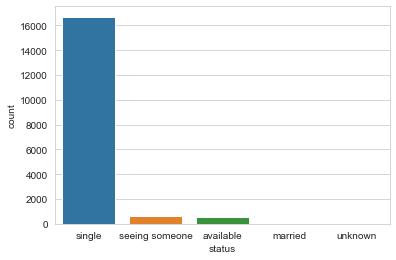

In [47]:
#plot_feature_target(train,test,"train","test",["status"])
#sns.countplot(train["status"],label="train")
sns.countplot(test["status"],label="test")

In [48]:
#label transforming the target column
label=LabelEncoder()
label.fit(train["status"])
train["status_trans_le"]=label.transform(train["status"])
test["status_trans_le"]=label.transform(test["status"])
test["status_trans_le"].value_counts()

3    16708
2      611
0      567
1       95
4        4
Name: status_trans_le, dtype: int64

In [49]:
train.status.value_counts()

single            38987
seeing someone     1453
available          1297
married             215
unknown               6
Name: status, dtype: int64

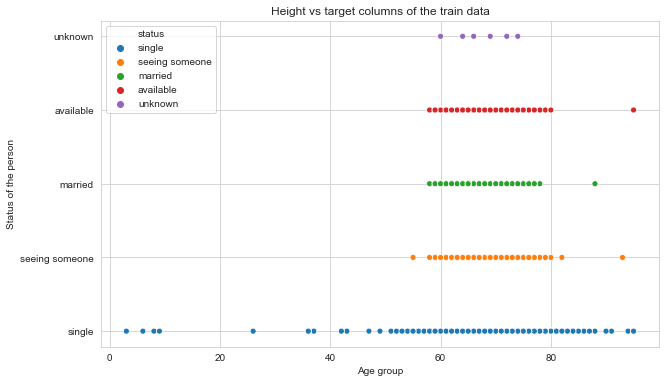

In [50]:
#lets see the height vs target columns
plt.figure(figsize=(10,6))
plt.title("Height vs target columns of the train data")
sns.scatterplot(train["height"],train["status"],hue=train["status"])
plt.xlabel("Age group")
plt.ylabel("Status of the person")
color=["red","blue","green","yellow","cyan"]
#plt.legend(color,["single","seeing someone","available","married","unknown"])
plt.legend()
plt.show()

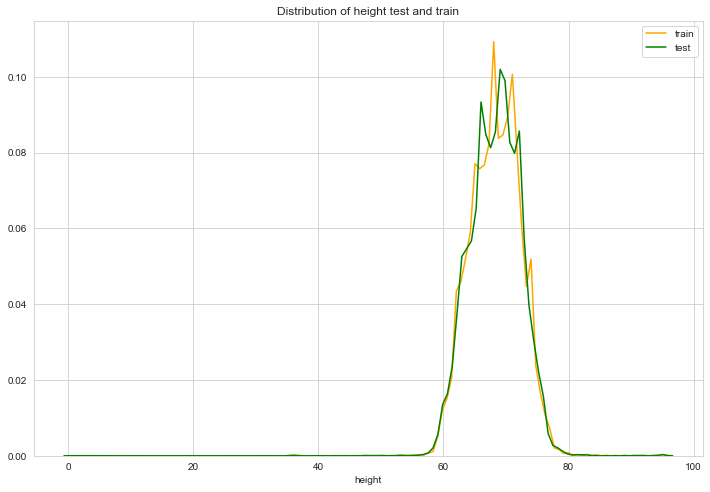

In [51]:
#checking the distribution of the height column
plt.figure(figsize=(12,8))
plt.title("Distribution of height test and train")
sns.distplot(train["height"],label="train",color="orange",hist=False)
sns.distplot(test["height"],label="test",color="green",hist=False)
plt.legend()
plt.show()

#as we can see that there is a bit difference in the test and train height column

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41958 entries, 1519 to 10862
Data columns (total 32 columns):
age                        41958 non-null object
body_type                  41958 non-null object
diet                       41958 non-null object
drinks                     41958 non-null object
drugs                      41958 non-null object
education                  41958 non-null object
aboutme                    38111 non-null object
work_profession_details    36650 non-null object
your_speciality            35264 non-null object
describe_your_look         33989 non-null object
things_you_do              34588 non-null object
things_you_love_todo       34360 non-null object
things_you_love_todo1      32359 non-null object
things_you_prefer_todo     33308 non-null object
what_brings_you_here       28595 non-null object
pickup_lines               33170 non-null object
ethnicity                  41958 non-null object
height                     41958 non-null float64
incom

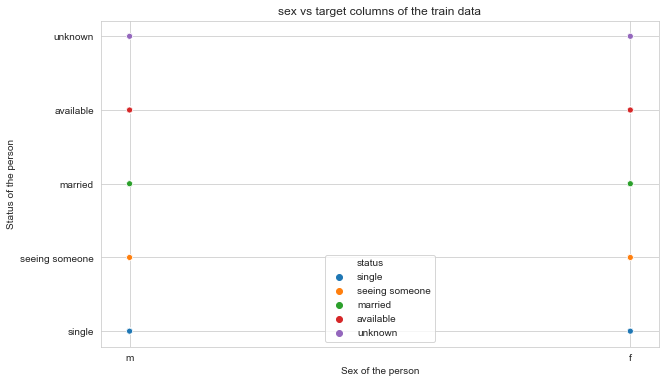

Wall time: 13 s


In [53]:
%%time
# t0=train.loc[train["status_trans_le"]==0]
# t1=train.loc[train["status_trans_le"]==1]
# t2=train.loc[train["status_trans_le"]==2]
# t3=train.loc[train["status_trans_le"]==3]
# t4=train.loc[train["status_trans_le"]==4]
#lets see the height vs target columns
plt.figure(figsize=(10,6))
plt.title("sex vs target columns of the train data")
sns.scatterplot(train["sex"],train["status"],hue=train["status"])
plt.xlabel("Sex of the person")
plt.ylabel("Status of the person")
#color=["red","blue","green","yellow","cyan"]
#plt.legend(color,["single","seeing someone","available","married","unknown"])
plt.legend()
plt.show()

In [54]:
train["sex"].unique()

array(['m', 'f'], dtype=object)

<Figure size 720x432 with 0 Axes>

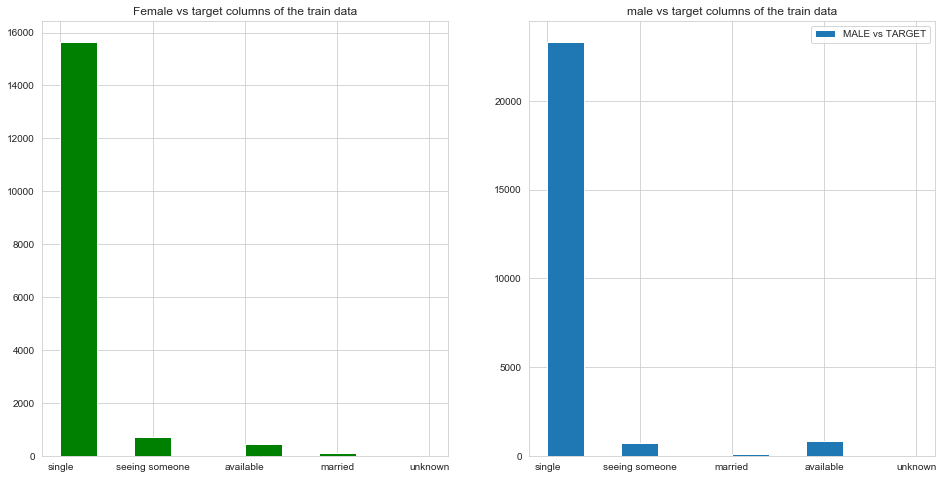

Wall time: 1.01 s


In [55]:
%%time
data_sex_f=train.loc[train["sex"]=='f']
data_sex_m=train.loc[train["sex"]=='m']
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

ax1.hist(data_sex_f["status"],label="FEMALE vs TARGET",color="green",histtype="barstacked")
ax1.set_title("Female vs target columns of the train data")
#ax2.title("Female vs target columns of the train data")
ax2.hist(data_sex_m["status"],label="MALE vs TARGET",histtype="barstacked")
ax2.set_title("male vs target columns of the train data")
plt.legend()
plt.show()


# Lets add some feature engineering for EDA

In [56]:
value=train.columns[6:16]

In [ ]:
for val in value:
    print(val)
    cleaned_datatrain["len_"+val]=train[val].str.findall(r'(\w+)').str.len()
    cleaned_datatest["len_"+val]=test[val].str.findall(r'(\w+)').str.len()
    train["len_"+val]=train[val].str.findall(r'(\w+)').str.len()
    test["len_"+val]=test[val].str.findall(r'(\w+)').str.len()

In [ ]:
cleaned_datatest.shape,cleaned_datatrain.shape

In [ ]:
cleaned_datatrain.head()

In [ ]:
%%time
value=cleaned_datatest.iloc[:,21:].columns
for val in value:
    cleaned_datatrain[val].fillna(0,inplace=True)
    cleaned_datatest[val].fillna(0,inplace=True)

In [ ]:
#dropping language column beacuse of too many unique values and shortage of time
cleaned_datatrain.drop(["speaks"],axis=1,inplace=True)
cleaned_datatest.drop(["speaks"],axis=1,inplace=True)


In [ ]:
#lets check the target column of the people who have descrited themselves well
cleaned_datatest["status_trans_le"]=test["status_trans_le"]
cleaned_datatrain["status_trans_le"]=train["status_trans_le"]

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_datatrain["len_aboutme"],cleaned_datatrain["status"])
sns.scatterplot(cleaned_datatrain["len_describe_your_look"],cleaned_datatrain["status"])


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_datatrain["len_things_you_do"],cleaned_datatrain["status"])
sns.scatterplot(cleaned_datatrain["len_things_you_love_todo"],cleaned_datatrain["status"])


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_datatrain["len_things_you_prefer_todo"],cleaned_datatrain["status"])
sns.scatterplot(cleaned_datatrain["len_what_brings_you_here"],cleaned_datatrain["status"])


In [ ]:
#changing the datatype of age column
cleaned_datatrain["age"]=cleaned_datatrain["age"].astype('int')
cleaned_datatest["age"]=cleaned_datatest["age"].astype('int')

In [ ]:
plt.figure(figsize=(10,6))
plt.title("age plot of train vs test")
sns.set_style('whitegrid')
sns.distplot(cleaned_datatrain["age"],label="train",color="green",kde=True,hist=True)
sns.distplot(cleaned_datatest["age"],label="test",color="blue",kde=True,hist=True)
#cleaned_datatrain["age"].plot(kde=True,kind="hist",color="green")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.title("train age vs status")
sns.set_style('whitegrid')
sns.scatterplot(cleaned_datatrain["age"],cleaned_datatrain["status"],color="green")
plt.legend()
plt.show()

In [ ]:
#lets check the spread in the age column
plt.figure(figsize=(10,6))
plt.title("train age vs status")
sns.set_style('whitegrid')
sns.violinplot(cleaned_datatrain["age"],cleaned_datatrain["status"])
plt.legend()
plt.show()

In [ ]:
#lets check the outliers in the age column
plt.figure(figsize=(10,6))
plt.title("train age vs status")
sns.set_style('whitegrid')
sns.boxplot(cleaned_datatrain["age"],cleaned_datatrain["status"])
plt.legend()
plt.show()

In [ ]:
#lets check the outliers in the age column
plt.figure(figsize=(10,6))
plt.title("test age vs status")
sns.set_style('whitegrid')
sns.boxplot(cleaned_datatest["age"],cleaned_datatest["status"])
plt.legend()
plt.show()

In [ ]:
def plot_scatterplot(df1, df2,features):
    sns.set_style('whitegrid')
    plt.figure()
    i = 0
    fig, ax = plt.subplots(4,3,figsize=(15,15))
    for feature in features:
        i += 1
        plt.subplot(4,3,i)
        plt.scatter(df1[feature], df2[feature], marker='*')
        plt.xlabel(feature, fontsize=9)
    plt.show();
#checking the train and test data spread

In [ ]:
#to check the similarity between the test and train data hich we have splitted
#cancatinating train columns of int and float 
integer_column_names=cleaned_datatrain.select_dtypes('int')
float_col_names=cleaned_datatrain.select_dtypes('float')
merged_df_train=pd.concat([integer_column_names,float_col_names],axis=1)
#test numeric columns columns of int and float
integer_column_names=cleaned_datatest.select_dtypes('int')
float_col_names=cleaned_datatest.select_dtypes('float')
merged_df_test=pd.concat([integer_column_names,float_col_names],axis=1)
merged_df_test.shape,merged_df_train.shape

In [ ]:
%%time
#this 
feature=merged_df_train.columns.values
print(feature)
plot_scatterplot(merged_df_train.sample(n=1500),merged_df_test.sample(n=1500),features=feature)

In [ ]:
cleaned_datatest["status"].dtype

In [ ]:
dataset_object_colnames=[]
for colname in cleaned_datatrain.columns:
    if cleaned_datatest[colname].dtype=='O':
        dataset_object_colnames.append(colname)

In [ ]:
dataset_object_colnames

In [ ]:
# for i in dataset_object_colnames:
#     print(i)
#     cleaned_datatrain[i]=cleaned_datatrain[i].str.replace("<","")
#     cleaned_datatest[i]=cleaned_datatest[i].str.replace("<","")
cleaned_datatrain["income"]=cleaned_datatrain["income"].astype('float')
cleaned_datatest["income"]=cleaned_datatest["income"].astype('float')
#cleaned_datatrain["last_online"]=cleaned_datatrain["last_online"].to_date()
cleaned_datatrain.drop(['last_online'],axis=1,inplace=True)
cleaned_datatest.drop(['last_online'],axis=1,inplace=True)

In [ ]:
%%time
#label encoding all the columns 
label=LabelEncoder()
# for i in dataset_object_colnames:
#     print(i)
#     cleaned_datatrain[i]=label.fit_transform(cleaned_datatrain[i])
#     cleaned_datatest[i]=label.fit_transform(cleaned_datatest[i])
cleaned_datatrain["body_type"]=label.fit_transform(cleaned_datatrain["body_type"])
cleaned_datatest["body_type"]=label.fit_transform(cleaned_datatest["body_type"])

cleaned_datatrain["job"]=label.fit_transform(cleaned_datatrain["job"])
cleaned_datatest["job"]=label.fit_transform(cleaned_datatest["job"])

cleaned_datatrain["diet"]=label.fit_transform(cleaned_datatrain["diet"])
cleaned_datatest["diet"]=label.fit_transform(cleaned_datatest["diet"])

cleaned_datatrain["drinks"]=label.fit_transform(cleaned_datatrain["drinks"])
cleaned_datatest["drinks"]=label.fit_transform(cleaned_datatest["drinks"])

cleaned_datatrain["drugs"]=label.fit_transform(cleaned_datatrain["drugs"])
cleaned_datatest["drugs"]=label.fit_transform(cleaned_datatest["drugs"])

cleaned_datatrain["education"]=label.fit_transform(cleaned_datatrain["education"])
cleaned_datatest["education"]=label.fit_transform(cleaned_datatest["education"])

cleaned_datatrain["offspring"]=label.fit_transform(cleaned_datatrain["offspring"])
cleaned_datatest["offspring"]=label.fit_transform(cleaned_datatest["offspring"])


cleaned_datatrain["orientation"]=label.fit_transform(cleaned_datatrain["orientation"])
cleaned_datatest["orientation"]=label.fit_transform(cleaned_datatest["orientation"])


cleaned_datatrain["pets"]=label.fit_transform(cleaned_datatrain["pets"])
cleaned_datatest["pets"]=label.fit_transform(cleaned_datatest["pets"])


cleaned_datatrain["religion"]=label.fit_transform(cleaned_datatrain["religion"])
cleaned_datatest["religion"]=label.fit_transform(cleaned_datatest["religion"])


cleaned_datatrain["sex"]=label.fit_transform(cleaned_datatrain["sex"])
cleaned_datatest["sex"]=label.fit_transform(cleaned_datatest["sex"])


cleaned_datatrain["sign"]=label.fit_transform(cleaned_datatrain["sign"])
cleaned_datatest["sign"]=label.fit_transform(cleaned_datatest["sign"])


cleaned_datatrain["smokes"]=label.fit_transform(cleaned_datatrain["smokes"])
cleaned_datatest["smokes"]=label.fit_transform(cleaned_datatest["smokes"])

In [ ]:
locations=pd.DataFrame(list(cleaned_datatest["location"].str.split(",")))
locations.columns=['a','b']

locations['b']=locations['b'].str.replace(" ","")
locations['b'].unique()

In [ ]:
#cleaned_datatrain["location"]=
#label encoding the locations in train
locations=pd.DataFrame(list(cleaned_datatrain["location"].str.split(pat=",")))
locations.columns=['a','b','c']
locations['b']=locations['b'].str.replace(" ","")
cleaned_datatrain["location"]=locations['b']

cleaned_datatrain["location"]=cleaned_datatrain["location"].map({'california':0, 'districtofcolumbia':1, 'newyork':2, 'oregon':3,
                                                                 'minnesota':4, 'michigan':5, 'washington':6, 'switzerland':7,
                                                                 'mexico':8,'texas':9, 'ireland':10, 'pennsylvania':11, 'illinois':12,
                                                                 'virginia':13,'massachusetts':14, 'germany':15, 'spain':16, 'netherlands':17,
                                                                 'wisconsin':18,'colorado':19,  'florida':20, 'idaho':21, 'arizona':22,
                                                                 'britishcolumbia':23, 'northcarolina':24, 'westvirginia':25, 'ohio':26,
                                                                 'tennessee':27,  'georgia':28, 'hawaii':29, 'mississippi':30,'unitedkingdom':31,'utah':32,
                                                                 'vietnam':33,'nevada':34,'montana':35,'connecticut':36, 'newjersey':37,
                                                                 'rhodeisland':38,'louisiana':39})



In [ ]:
#cleaned_datatrain["location"]=label.fit_transform(cleaned_datatrain["location"])
#label encoding the locations in test
locations=pd.DataFrame(list(cleaned_datatest["location"].str.split(pat=",")))
locations.columns=['a','b']

locations['b']=locations['b'].str.replace(" ","")
cleaned_datatest["location"]=locations['b']
cleaned_datatest["location"]=cleaned_datatest["location"].map({'california':0, 'districtofcolumbia':1, 'newyork':2, 'oregon':3,
                                                                 'minnesota':4, 'michigan':5, 'washington':6, 'switzerland':7,
                                                                 'mexico':8,'texas':9, 'ireland':10, 'pennsylvania':11, 'illinois':12,
                                                                 'virginia':13,'massachusetts':14, 'germany':15, 'spain':16, 'netherlands':17,'wisconsin':18,'colorado':19,  'florida':20, 'idaho':21, 'arizona':22,
                                                                 'britishcolumbia':23, 'northcarolina':24, 'westvirginia':25, 'ohio':26,
                                                                 'tennessee':27,  'georgia':28, 'hawaii':29, 'mississippi':30,'unitedkingdom':31,'utah':32,
                                                                 'vietnam':33,'nevada':34,'montana':35,'connecticut':36, 'newjersey':37,
                                                                 'rhodeisland':38,'louisiana':39})
#cleaned_datatest["location"]=label.fit_transform(cleaned_datatest["location"])


In [ ]:
cleaned_datatrain["location"].fillna(40.0,inplace=True)
cleaned_datatest["location"].fillna(40.0,inplace=True)

In [ ]:
cleaned_datatest.drop(["ethnicity"],axis=1,inplace=True)
cleaned_datatrain.drop(["ethnicity"],axis=1,inplace=True)


In [ ]:
cleaned_datatrain.shape,cleaned_datatest.shape

In [ ]:
train_cleaned_x=cleaned_datatrain.drop(["status"],axis=1)
train_cleaned_y=cleaned_datatrain["status_trans_le"]
test_cleaned_x=cleaned_datatest.drop(["status"],axis=1)
test_cleaned_y=cleaned_datatest["status_trans_le"]
print(str(train_cleaned_x.shape)+"_"+str(train_cleaned_y.shape)+"and test shape is "+str(test_cleaned_x.shape)+"_"+str(test_cleaned_y.shape))

# MODELING PROCESS

In [ ]:
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression,SGDClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,Deci

In [ ]:
help(GradientBoostingClassifier)

In [ ]:
lrc=LogisticRegression(class_weight="balanced",n_jobs=-1,verbose=2)
sgc=SGDClassifier(class_weight="balanced",n_jobs=-1,verbose=2)
rfc=RandomForestClassifier(class_weight="balanced",n_jobs=-1,verbose=2)
abc=AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight="balanced"),n_jobs=-1,verbose=2)
etc=ExtraTreesClassifier(class_weight="balanced",n_jobs=-1,verbose=2)
#gbc=GradientBoostingClassifier(class_weight="balanced")
xgc=XGBClassifier(class_weight="balanced",n_jobs=-1,verbose=2)
lgbc=LGBMClassifier(class_weight="balanced",n_jobs=-1,verbose=2)

In [ ]:
lrc.fit(train_cleaned_x,train_cleaned_y)
sgc.fit(train_cleaned_x,train_cleaned_y)
rfc.fit(train_cleaned_x,train_cleaned_y)
abc.fit(train_cleaned_x,train_cleaned_y)
etc.fit(train_cleaned_x,train_cleaned_y)
xgc.fit(train_cleaned_x,train_cleaned_y)
lgbc.fit(train_cleaned_x,train_cleaned_y)


In [ ]:
predicted_lrc=lrc.predict(test_cleaned_x)
predicted_sgc=sgc.predict(test_cleaned_x)
predicted_rfc=rfc.predict(test_cleaned_x)
predicted_abc=abc.predict(test_cleaned_x)
predicted_etc=etc.predict(test_cleaned_x)
predicted_xgc=xgc.predict(test_cleaned_x)
predicted_lgbc=lgbc.predict(test_cleaned_x)



In [ ]:

#probability
proba_predicted_lrc=lrc.predict_proba(test_cleaned_x)
#proba_predicted_sgc=sgc.predict_proba(test_cleaned_x)
proba_predicted_rfc=rfc.predict_proba(test_cleaned_x)
proba_predicted_abc=abc.predict_proba(test_cleaned_x)
proba_predicted_etc=etc.predict_proba(test_cleaned_x)
proba_predicted_xgc=xgc.predict_proba(test_cleaned_x)
proba_predicted_lgbc=lgbc.predict_proba(test_cleaned_x)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss

In [ ]:
#accuracy of the models
print("The accuracy score of lrc is"+str(accuracy_score(y_pred=predicted_lrc,y_true=test_cleaned_y)))
print("The accuracy score of rfc is"+str(accuracy_score(y_pred=predicted_rfc,y_true=test_cleaned_y)))
print("The accuracy score of sgc is"+str(accuracy_score(y_pred=predicted_sgc,y_true=test_cleaned_y)))
print("The accuracy score of abc is"+str(accuracy_score(y_pred=predicted_abc,y_true=test_cleaned_y)))
print("The accuracy score of etc is"+str(accuracy_score(y_pred=predicted_etc,y_true=test_cleaned_y)))
print("The accuracy score of xgc is"+str(accuracy_score(y_pred=predicted_xgc,y_true=test_cleaned_y)))
print("The accuracy score of lgbc is"+str(accuracy_score(y_pred=predicted_lgbc,y_true=test_cleaned_y)))

In [ ]:
#confusion matrix
print("The confusion matrix of lrc is"+str(confusion_matrix(y_pred=predicted_lrc,y_true=test_cleaned_y)))
print("The confusion matrix of rfc is"+str(confusion_matrix(y_pred=predicted_rfc,y_true=test_cleaned_y)))
print("The confusion matrix of sgc is"+str(confusion_matrix(y_pred=predicted_sgc,y_true=test_cleaned_y)))
print("The confusion matrix of abc is"+str(confusion_matrix(y_pred=predicted_abc,y_true=test_cleaned_y)))
print("The confusion matrix of etc is"+str(confusion_matrix(y_pred=predicted_etc,y_true=test_cleaned_y)))
print("The confusion matrix of xgc is"+str(confusion_matrix(y_pred=predicted_xgc,y_true=test_cleaned_y)))
print("The confusion matrix of lgbc is"+str(confusion_matrix(y_pred=predicted_lgbc,y_true=test_cleaned_y)))

In [ ]:
#f1score 
print("The f1_score of lrc is"+str(f1_score(y_pred=predicted_lrc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of rfc is"+str(f1_score(y_pred=predicted_rfc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of sgc is"+str(f1_score(y_pred=predicted_sgc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of abc is"+str(f1_score(y_pred=predicted_abc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of etc is"+str(f1_score(y_pred=predicted_etc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of xgc is"+str(f1_score(y_pred=predicted_xgc,y_true=test_cleaned_y,average="micro")))
print("The f1_score of lgbc is"+str(f1_score(y_pred=predicted_lgbc,y_true=test_cleaned_y,average="micro")))